**Import necessary library**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read the dataset**

In [3]:
column_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_title = pd.read_csv('Movie_Id_Titles')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df2 = pd.merge(df,movie_title,on='item_id')
df2.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


**Set the Seaborn Style to White**

In [8]:
sns.set_style('white')

**Group movie titles by their average ratings**

In [9]:
df2.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

**The Information above could be deceiving because they could have been rated by only 1 person, and you see that happening below**

In [10]:
df2.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
data_dict = {
    'ratings':df2.groupby('title')['rating'].mean(),
    'ratings_counts':df2.groupby('title')['rating'].count()
}
ratings_df = pd.DataFrame(data_dict)
ratings_df.head()

,ratings,ratings_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [35]:
ratings_df.sort_values('ratings',ascending=False).head()

,ratings,ratings_counts
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


**Most movies are rated by just 1 person**

<Axes: >

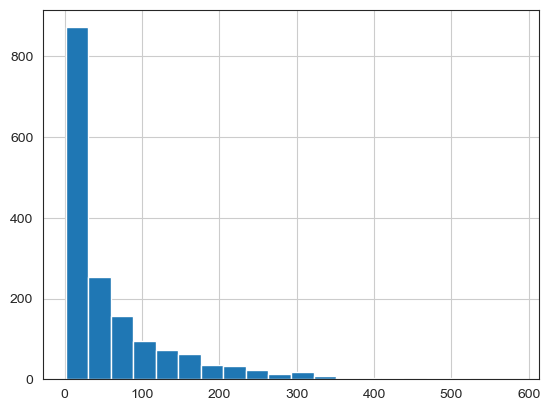

In [12]:
ratings_df['ratings_counts'].hist(bins=20)

**Most movies receive an between 3 and 4 stars**

<Axes: >

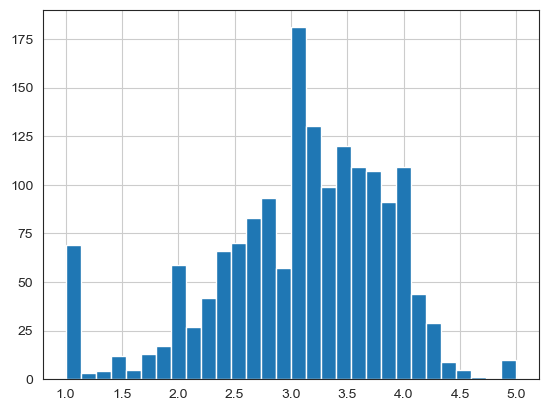

In [13]:
ratings_df['ratings'].hist(bins=30)

**Relationship between average movie rating and ratings count**

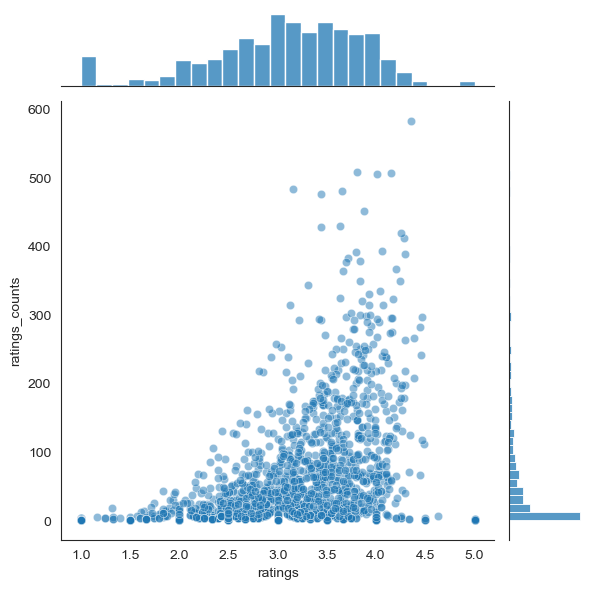

In [28]:
sns.jointplot(data=ratings_df,x='ratings',y='ratings_counts',alpha=0.5);

In [15]:
df2.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


**Creating a sparse matrix of all movie titles**

In [16]:
movie_mat = df2.pivot_table(index='user_id',columns='title',values='rating')

In [37]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**I want to examine movies correlated with star wars and liar liar**

In [17]:
star_wars_rating = movie_mat['Star Wars (1977)']
liar_liar_rating = movie_mat['Liar Liar (1997)']
liar_liar_rating

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

**Correlating each column with star wars rating and liar liar rating**

In [31]:
import warnings

# Suppress the specific RuntimeWarnings for the lines of code you want
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    # Perform the correlation calculations
    similar_to_starwars = movie_mat.corrwith(star_wars_rating)
    similar_to_liar_liar = movie_mat.corrwith(liar_liar_rating)

# The warnings filter will be automatically reset outside of the 'with' block.
# Any warnings generated after this point will not be suppressed.

In [19]:
similar_to_liar_liar.sort_values(ascending =False)['101 Dalmatians (1996)']

0.4697648694257713

In [20]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

**Values correlated with starwars can be misleading because they might only be rated by a few people. To combact this we filter based on ratings counts**

In [21]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars_ratings = corr_starwars.join(ratings_df['ratings_counts'])
corr_starwars_ratings = corr_starwars_ratings.dropna()
corr_starwars_ratings.head()

,Correlation,ratings_counts
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


**Only show values that have above 100 ratings count, Empire Strikes Back is the most correlated with star wars**

In [22]:
corr_starwars_ratings[corr_starwars_ratings['ratings_counts']>100].sort_values('Correlation',ascending=False).head()

,Correlation,ratings_counts
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


**Values correlated with LiarLiar can be misleading because they might only be rated by a few people. To combact this we filter based on ratings counts**

In [23]:
corr_liarliar = pd.DataFrame(similar_to_liar_liar,columns=['Correlation'])
corr_liarliar_ratings = corr_liarliar.join(ratings_df['ratings_counts'])
corr_liarliar_ratings = corr_liarliar_ratings.dropna()
corr_liarliar_ratings.head()   

,Correlation,ratings_counts
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


**Only show values that have above 100 ratings count, Batman Forever is the most correlated with Liar Liar**

In [24]:
corr_liarliar_ratings[corr_liarliar_ratings['ratings_counts']>100].sort_values('Correlation',ascending=False).head()

,Correlation,ratings_counts
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
